In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [5]:
covid = pd.read_csv('/Users/jenzyy/Documents/GitHub/Randomized-SVD/data/covid data/covid_new_cases_arranged.csv')
fig = go.Figure(data=[go.Surface(z=covid.values)])
fig.update_layout(title='Arranged New Cases',autosize=True)
fig.show()

In [15]:
covid = pd.read_csv("../data/covid data/covid_state_new.csv")

# clean data
state_name = covid['State']
covid_num = covid.drop(columns=["Unnamed: 0","State"])

# scale each state
covid_scaled = (covid_num - covid_num.mean())/(covid_num.std())
covid_scaled.dropna(inplace=True,axis='columns')
df_covid = covid_scaled.loc[:,'2/6/20':].values # select data after 2/6/20
dates = list(covid_scaled.columns)

# SVD
u, s, v = np.linalg.svd(df_covid, full_matrices=True)

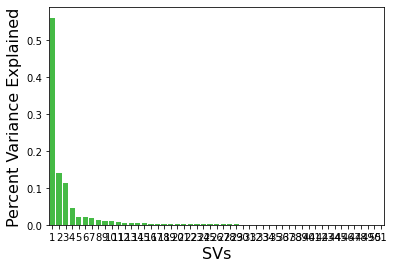

In [9]:
# scree plot of singular values
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="limegreen")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=100)

In [16]:
labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(v[:,0:2], index=dates, columns=labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Date'}, inplace=True)
svd_df.head()

,Date,SV1,SV2
0,2/6/20,0.024409,0.024409
1,2/17/20,-0.097391,-0.097391
2,2/29/20,0.075631,0.075631
3,3/2/20,0.292669,0.292669
4,3/3/20,0.184819,0.184819


Text(0, 0.5, 'SV 1: 56.00000000000001%')

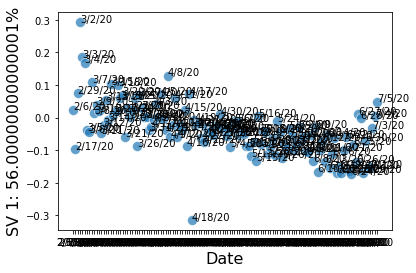

In [22]:
sns.scatterplot(x="Date", y="SV1", 
                data=svd_df, s=100,
                alpha=0.7)
for j in range(svd_df.shape[0]):  
    plt.text(svd_df['Date'][j],svd_df['SV1'][j],svd_df['Date'][j])
plt.xlabel('Date', fontsize=16)
plt.ylabel('SV 1: {0}%'.format(var_explained[0]*100), fontsize=16)

In [6]:
coviddata = pd.read_csv('/Users/jenzyy/Documents/GitHub/Randomized-SVD/data/covid data/covid_deaths_usafacts.csv')
coviddata = coviddata.drop(columns=['stateFIPS','countyFIPS'])
coviddeathsdata = coviddata.loc[coviddata['County Name'].str.contains('Statewide', case=False),:]
coviddata_meta = coviddeathsdata.loc[:, ['State']]
coviddeathsdata = coviddeathsdata.drop(columns=['County Name','State'])
fig = go.Figure(data=[go.Surface(z=coviddeathsdata.values)])
fig.update_layout(title='COVID-19 Deaths Data',autosize=True)
fig.show()

In [7]:
coviddata_scaled = coviddeathsdata-coviddeathsdata.mean()
u, s, v = np.linalg.svd(coviddata_scaled, full_matrices=True)
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
labels= ['SV'+str(i) for i in range(1,51)]
svd_df = pd.DataFrame(u[:,0:50], index=coviddata_meta["State"].tolist(), columns=labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'State'}, inplace=True)
s = np.diag(s)
approx_uptorank1_meancentered = u[:,:1] @ s[0:1,:1] @ v[:1,:]
a = coviddeathsdata.mean()
b = a.values
approx_uptorank1 = approx_uptorank1_meancentered + b
fig = go.Figure(data=[go.Surface(z=approx_uptorank1)])
fig.update_layout(title='SV1 Only',autosize=True)
fig.show()

In [7]:
approx_uptorank2_meancentered = u[:,:2] @ s[0:2,:2] @ v[:2,:]
approx_justrank2 = approx_uptorank2_meancentered - approx_uptorank1_meancentered + b
fig = go.Figure(data=[go.Surface(z=approx_justrank2)])
fig.update_layout(title='SV2 Only',autosize=True)
fig.show()

In [8]:
approx_uptorank3_meancentered = u[:,:3] @ s[0:3,:3] @ v[:3,:]
approx_justrank3 = approx_uptorank3_meancentered - approx_uptorank2_meancentered - approx_uptorank1_meancentered + b
fig = go.Figure(data=[go.Surface(z=approx_justrank3)])
fig.update_layout(title='SV2 Only',autosize=True)
fig.show()

In [9]:
approx_uptorank3 = approx_uptorank3_meancentered + b
fig = go.Figure(data=[go.Surface(z=approx_uptorank3)])
fig.update_layout(title='Approximation Up To SV3',autosize=True)
fig.show()

In [11]:
residualnumbers = coviddeathsdata - approx_uptorank3
fig = go.Figure(data=[go.Surface(z=residualnumbers)])
fig.update_layout(title='Residual',autosize=True)
fig.show()